In [1]:
#Done by SANJAY MALLASAMUDRAM SANTHANAM ; USC ID:3124715393
#perceptron learning algo
import pandas as pd
import numpy as np
import math
from operator import truediv,add 
import copy

In [2]:
#read data 
data=np.loadtxt('C:/Users/Lenovo/Desktop/classification.txt',delimiter=",")

In [3]:
#Check data
np.shape(data)

(2000, 5)

In [4]:
data

array([[ 0.750072  ,  0.97740794,  0.88565752, -1.        ,  1.        ],
       [ 0.87791369,  0.01925101,  0.50671112,  1.        , -1.        ],
       [ 0.7773246 ,  0.99406596,  0.82224385, -1.        ,  1.        ],
       ...,
       [ 0.5155064 ,  0.15354364,  0.01275495,  1.        ,  1.        ],
       [ 0.2282263 ,  0.97155357,  0.18305906, -1.        ,  1.        ],
       [ 0.36391513,  0.49207061,  0.71952659, -1.        ,  1.        ]])

In [5]:
#take first 4 columns for data points and labels
data=data[:,0:4]

In [6]:
#cross verify correctness
data

array([[ 0.750072  ,  0.97740794,  0.88565752, -1.        ],
       [ 0.87791369,  0.01925101,  0.50671112,  1.        ],
       [ 0.7773246 ,  0.99406596,  0.82224385, -1.        ],
       ...,
       [ 0.5155064 ,  0.15354364,  0.01275495,  1.        ],
       [ 0.2282263 ,  0.97155357,  0.18305906, -1.        ],
       [ 0.36391513,  0.49207061,  0.71952659, -1.        ]])

In [7]:
np.shape(data)

(2000, 4)

In [8]:
#N is total number of data points
N= len(data)

In [9]:
#assigning data points and labels
X=data[:,0:3].T
# d is numner of dimensions
d=len(X[:,0])
#Add x0=1 to all data points
X=np.vstack((np.ones((1,2000)),X))
y=data[:,3]
# assign weights to be zero vector
#w=np.random.random(size=(d+1,1))
w=np.zeros((d+1,1))

In [10]:
#count measures how many data points passed without change in weight w. If if comes equal to N i.e. we completed one full
#round of data without changing weights w, it means we have reached convergence.In case data is not linearly separable, break
#after 7000 iterations.
#alpha is learning rate
alpha=0.0001
#counts how many data points seen afer last modification of weights. If count=N, it means the whole of dataset is seen
#without modifying the weights and hence convergence. 
count=0
#used to break loop in case the convergence takes long time or when the data is not linearly separable
itr=7000
while(count!=N and itr):
    i=0
    while(i<N and count!=N):
        flag=0
        if(np.matmul(w.T,X[:,i])>=0 and y[i]<0):
            w-=alpha*np.reshape(X[:,i],(d+1,1))
            flag=1
        elif(np.matmul(w.T,X[:,i])<0 and y[i]>0):
            w+=alpha*np.reshape(X[:,i],(d+1,1))
            flag=1
        if(flag):
            count=0
        else:
            count+=1
        i+=1
        #print(w)
    itr-=1
print("Converged after ",7000-itr," iterations")
print("Final weight: ",w)
#y_hat is predicted values
y_hat=np.zeros(shape=(np.shape(y)))
err=0
for i in range(N):
    y_hat[i]=np.sign(np.matmul(w.T,X[:,i]))
    if(y_hat[i]!=y[i]):
        err+=1
    
print('Accuracy:', (N-err)/N)
print("Number of misclassified points: ",err)
#print("Mean accuracy: ",(N-err)/N)

Converged after  1238  iterations
Final weight:  [[ 0.        ]
 [ 0.00939936]
 [-0.00753947]
 [-0.00563132]]
Accuracy: 1.0
Number of misclassified points:  0


In [11]:
#library function for perceptron learning
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X.T, y)
print("Weights calculated by library function:\n",clf.coef_)

Weights calculated by library function:
 [[  0.          24.35173999 -18.56164074 -14.10260498]]


In [12]:
#accuracy score
clf.score(X.T,y)

0.98

In [13]:
#It can be seen that the weight calculated by the libray function is almost a multiple(by a factor of 2500) of the weight calulated by implementation.
#Since multiples of weights give the same result as the original, the accuracy wont change as the sign() of the final result
#is only required, not the numerical value.


In [14]:
#pocket algo
#read data
data=np.loadtxt('C:/Users/Lenovo/Desktop/classification.txt',delimiter=",")
N=len(data)
#assign data points 
X=data[:,0:3].T
#number fo dimensions of data points
d=len(X[:,0])
#Add x0=1 to all data points
X=np.vstack((np.ones((1,2000)),X))
y=data[:,4]
#randomnly assign weights
w=np.zeros(shape=(d+1,1))

In [15]:
#count measures how many data points passed without change in weight w. If if comes equal to N i.e. we completed one full
#round of data without changing weights w, it means we have reached convergence
#alpha is learning rate
alpha=0.0001
#counts how many data points seen afer last modification of weights. If count=N, it means the whole of dataset is seen
#without modifying the weights and hence convergence. 
count=0
#used to break loop in case the convergence takes long time or when the data is not linearly separable
itr=7000
#stores minimum value of number of misclassifications across all iterations.Initialised with -1 before 1st iteration
misc=-1
#array to store no of misclassified points in each iteration
mis_arr=[]
#stores best weight .Initialised with zero
weig=np.zeros(shape=(d+1,1))
while(count!=N and itr):
    i=0
    #number of miclassifications in current iteration
    M=0
    while(i<N and count!=N):
        #flag denotes is there is a misclassification
        flag=0
        if(np.matmul(w.T,X[:,i])>=0 and y[i]<0):
            w-=alpha*np.reshape(X[:,i],(d+1,1))
            flag=1
        elif(np.matmul(w.T,X[:,i])<0 and y[i]>0):
            w+=alpha*np.reshape(X[:,i],(d+1,1))
            flag=1
        if(flag):
            count=0
            M+=1
        else:
            count+=1
        i+=1
        #print(w)
    itr-=1
    mis_arr.append(M)
    if(misc==-1 or M<misc):
        misc=M
        weig=copy.deepcopy(w)
        
print("best weight: ",weig)
print("best accuracy:",(N-misc)/N)
print("Lowest misclassification:",misc)
print("Weight after final iteration:,",w)
y_hat=np.zeros(shape=(np.shape(y)))
#stores number of misclassifications
err=0
#calculate number of misclassifications
for i in range(N):
    y_hat[i]=np.sign(np.matmul(w.T,X[:,i]))
    if(y_hat[i]!=y[i]):
        err+=1
    
print('Accuracy after final iteration:', (N-err)/N)
print("Number of misclassified points after final iteration: ",err)
#print("Mean accuracy: ",(N-err)/N)

best weight:  [[ 1.00000000e-04]
 [ 6.09348532e-05]
 [ 1.62586130e-04]
 [-3.65629844e-05]]
best accuracy: 0.53
Lowest misclassification: 940
Weight after final iteration:, [[1.00000000e-04]
 [2.81760345e-05]
 [1.19863056e-04]
 [5.45141147e-06]]
Accuracy after final iteration: 0.494
Number of misclassified points after final iteration:  1012


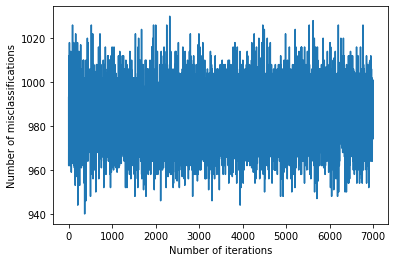

'\nNOTE: rerun this cell if the plot doesnt show. Sometimes rerunning the cell gives correct output. \n'

In [31]:
#graph of number of misclassification pts vs number of iterations
import matplotlib.pyplot as plt
plt.xlabel("Number of iterations")
plt.ylabel("Number of misclassifications")
plt.plot(mis_arr)
plt.show()
"""
NOTE: rerun this cell if the plot doesnt show. Sometimes rerunning the cell gives correct output. 
"""

In [17]:
#range of no. of miscalssification pts 
np.unique(mis_arr)

array([ 940,  944,  946,  947,  948,  950,  951,  952,  953,  954,  955,
        956,  957,  958,  959,  960,  961,  962,  963,  964,  965,  966,
        967,  968,  969,  970,  971,  972,  973,  974,  975,  976,  977,
        978,  979,  980,  981,  982,  983,  984,  985,  986,  987,  988,
        989,  990,  991,  992,  993,  994,  995,  996,  997,  998,  999,
       1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1014, 1016, 1017, 1018, 1020, 1022, 1024, 1026, 1028,
       1030])

In [18]:
#It is seen that the pocket algorithms stores the best weights obtained and it can also be seen that the weight after final 
#itertion of perceptron algorithm is less accurate than the best weight returned by the pocket algorithm

In [19]:
#library function to test how accurate the pocket algorithm implementation is with the perceptron learning algo
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X.T, y)
print("Weights calculated by library function:\n",clf.coef_)
print("Accuracy returned by pocket algo library function:",clf.score(X.T,y))

Weights calculated by library function:
 [[ 0.         -1.67159882 -1.89735341 -0.81731086]]
Accuracy returned by pocket algo library function: 0.506


In [20]:
#thus pocket algorithm implementation gives better result than standard perceptron learning algo

In [21]:
#logistic regression
data=np.loadtxt('C:/Users/Lenovo/Desktop/classification.txt',delimiter=",")
N=len(data)
#first 3 columns are data points
X=data[:,0:3].T
d=len(X[:,0])
#assign x0=1 to all data points
X=np.vstack((np.ones((1,2000)),X))
#last column is label
y=data[:,4]
#randomnly assign weights
#w=np.random.rand(d+1,1)
w=np.zeros((d+1,1))

In [22]:
#number of iterations
itr=7000
#learning rate
alpha=0.1
for i in range(itr):
    """
    #predict y labels for current weight assignment w.
    y_pred=np.exp(np.matmul(w.T,X))/(1+np.exp(np.matmul(w.T,X)))
    #update weights w. simultaneous update is done for all coefficients w0,w1,...,wd
    w-=alpha*np.dot(X,np.reshape((y_pred-y),(N,1)))/N
    #print loss every 1000 iterations to check if it nearing convergence 
    if(i%1000==0):
        print("Loss:",(-y * np.log(y_pred) - (1 - y) * np.log(1 - y_pred)).mean())
    """
    #stores derivative value which is sued to update weight w
    delta=np.zeros((d+1,1))
    #for j in range(N):
        #delta+=y[j]*np.reshape(X[:,j],(d+1,1))/(1+np.exp(y[j]*np.matmul(w.T,np.reshape(X[:,j],(d+1,1)))))
    #delta*=-1/N
    delta=-np.matmul(y.T/(1+np.exp(y.T*np.matmul(w.T,X))),X.T).T/N
    
    w-=alpha*delta 
    
print("Final weight: ",w)
#final prediction of lables
y_hat=np.zeros(shape=(np.shape(y)))
#used to count number of misclassified points
err=0
#find number of misclassified points
for i in range(N):
    y_hat[i]=np.sign(np.matmul(w.T,X[:,i]))
    if(np.sign(y_hat[i])!=np.sign(y[i])):
        err+=1
    
print('Accuracy:', (N-err)/N)
print("Number of misclassified points: ",err)
    

Final weight:  [[-0.03149498]
 [-0.17769975]
 [ 0.11444872]
 [ 0.07669738]]
Accuracy: 0.5295
Number of misclassified points:  941


In [23]:
#library function
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X.T, y)
print("Score:",clf.score(X.T, y))
print("Weights calculated by library function",clf.coef_)

Score: 0.5295
Weights calculated by library function [[-0.01550526 -0.17376308  0.11159028  0.07474653]]


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
#Weights  of both the library version and implementation are pretty similar.Accuracy of both versions are exactly the same

In [25]:
import numpy as np

In [26]:
#linear regression
data=np.loadtxt('C:/Users/Lenovo/Desktop/linear-regression.txt',delimiter=",")
N=len(data)
#first 2 data columns are x and y independent variables
X=data[:,0:2].T
d=len(X[:,0])
X=np.vstack((np.ones((1,N)),X))
#3rd column is z dependent variable
y=data[:,2]
#randomnly assign weights
w=np.random.rand(d+1,1)

In [27]:
#analytical solution for linear regression.
w=np.matmul(np.matmul(np.linalg.inv(np.matmul(X,X.T)),X),np.reshape(y,(N,1)))

In [28]:
print("Weights",w)

Weights [[0.01523535]
 [1.08546357]
 [3.99068855]]


In [29]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X.T, y)
print("Weights calculated by library function",reg.coef_)

Weights calculated by library function [0.         1.08546357 3.99068855]


In [30]:
#It can be seen that the weight calculated by the libray function is same as the weight calulated by implementation